In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("RAW_recipes.csv", engine='python', encoding='utf-8', error_bad_lines=False)
df.head()

C:\Users\joshg\AppData\Local\Temp\ipykernel_17888\4141240258.py:1: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv("RAW_recipes.csv", engine='python', encoding='utf-8', error_bad_lines=False)


,name,id,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,description,ingredients,n_ingredients
0,arriba baked winter squash mexican style,137739,55,47892,2005-09-16,"['60-minutes-or-less', 'time-to-make', 'course...","[51.5, 0.0, 13.0, 0.0, 2.0, 0.0, 4.0]",11,"['make a choice and proceed with recipe', 'dep...",autumn is my favorite time of year to cook! th...,"['winter squash', 'mexican seasoning', 'mixed ...",7
1,a bit different breakfast pizza,31490,30,26278,2002-06-17,"['30-minutes-or-less', 'time-to-make', 'course...","[173.4, 18.0, 0.0, 17.0, 22.0, 35.0, 1.0]",9,"['preheat oven to 425 degrees f', 'press dough...",this recipe calls for the crust to be prebaked...,"['prepared pizza crust', 'sausage patty', 'egg...",6
2,all in the kitchen chili,112140,130,196586,2005-02-25,"['time-to-make', 'course', 'preparation', 'mai...","[269.8, 22.0, 32.0, 48.0, 39.0, 27.0, 5.0]",6,"['brown ground beef in large pot', 'add choppe...",this modified version of 'mom's' chili was a h...,"['ground beef', 'yellow onions', 'diced tomato...",13
3,alouette potatoes,59389,45,68585,2003-04-14,"['60-minutes-or-less', 'time-to-make', 'course...","[368.1, 17.0, 10.0, 2.0, 14.0, 8.0, 20.0]",11,['place potatoes in a large pot of lightly sal...,"this is a super easy, great tasting, make ahea...","['spreadable cheese with garlic and herbs', 'n...",11
4,amish tomato ketchup for canning,44061,190,41706,2002-10-25,"['weeknight', 'time-to-make', 'course', 'main-...","[352.9, 1.0, 337.0, 23.0, 3.0, 0.0, 28.0]",5,['mix all ingredients& boil for 2 1 / 2 hours ...,my dh's amish mother raised him on this recipe...,"['tomato juice', 'apple cider vinegar', 'sugar...",8


In [3]:
dfc = df.copy()

In [4]:
all_ingredients = [word for sublist in dfc["ingredients"].str.strip("[]").str.replace("'", "").str.split(", ") for word in sublist]
ingredient_counts = pd.Series(all_ingredients).value_counts()
print(ingredient_counts)
#Salt, butter, sugar, onion, and water are the 5 most common ingredients

salt                                 85746
butter                               54975
sugar                                44535
onion                                39065
water                                34914
                                     ...  
fat-free cherry vanilla yogurt           1
baby banana puree                        1
vegetarian low-sodium baked beans        1
ginger peel                              1
nepitella                                1
Length: 14906, dtype: int64


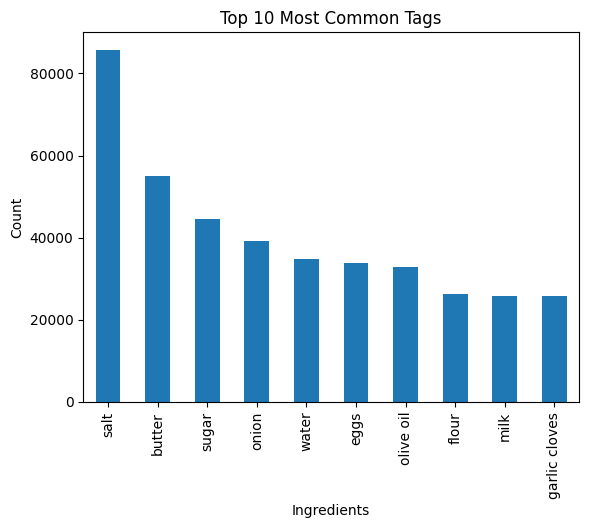

In [5]:
#Bar chart for 10 Most Common Ingredients
ingredient_counts.head(10).plot(kind='bar')
plt.xlabel('Ingredients')
plt.ylabel('Count')
plt.title('Top 10 Most Common Tags')
plt.show()

In [6]:
#Correlation matrix
plt.figure(figsize = (32,12))
corr_matrix = dfc.corr()
#Define the mask to set the values in the upper triangle to true
mask = np.triu(np.ones_like(corr_matrix, dtype = np.bool))
heatmap = sns.heatmap(corr_matrix, mask = mask,
                      vmin = -1, vmax = 1, annot = True, cmap = 'BrBG')
heatmap.set_title('Triangle Correlation Heatmap', fontdict = {'fontsize':18}, pad = 16);

#Suprisingly not much of a realtionship between #n_ingredients and minutes. Also surprising there is no relation between n_steps and minutes.

C:\Users\joshg\AppData\Local\Temp\ipykernel_17888\2882161572.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = dfc.corr()
C:\Users\joshg\AppData\Local\Temp\ipykernel_17888\2882161572.py:5: FutureWarning: In the future `np.bool` will be defined as the corresponding NumPy scalar.
  mask = np.triu(np.ones_like(corr_matrix, dtype = np.bool))


AttributeError: module 'numpy' has no attribute 'bool'.
`np.bool` was a deprecated alias for the builtin `bool`. To avoid this error in existing code, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
The aliases was originally deprecated in NumPy 1.20; for more details and guidance see the original release note at:
    https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

<Figure size 3200x1200 with 0 Axes>

In [7]:
print(dfc['tags'].head())

0    ['60-minutes-or-less', 'time-to-make', 'course...
1    ['30-minutes-or-less', 'time-to-make', 'course...
2    ['time-to-make', 'course', 'preparation', 'mai...
3    ['60-minutes-or-less', 'time-to-make', 'course...
4    ['weeknight', 'time-to-make', 'course', 'main-...
Name: tags, dtype: object


In [8]:
import ast

#Converting string reps of lists to actual lists
dfc['tags'] = dfc['tags'].apply(ast.literal_eval)

In [9]:
#Creating a row for each entry within a tag
ex_dfc = dfc.explode('tags')

In [10]:
tag_counts = ex_dfc['tags'].value_counts()

In [11]:
print(tag_counts.head(10))

preparation         230546
time-to-make        225326
course              218148
main-ingredient     170446
dietary             165091
easy                126062
occasion            114145
cuisine              91165
low-in-something     85776
main-dish            71786
Name: tags, dtype: int64


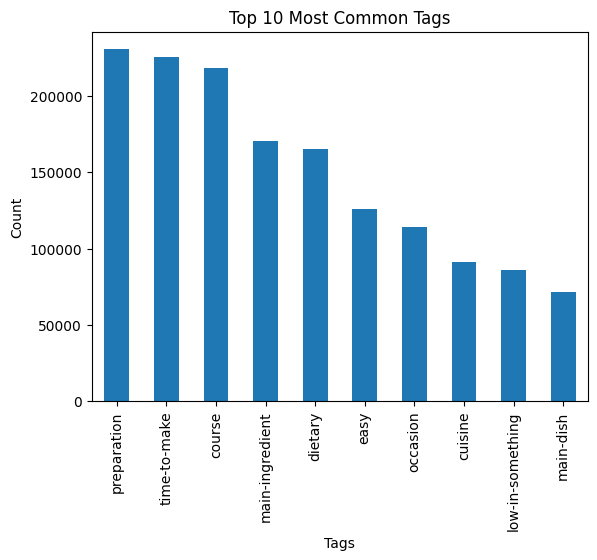

In [12]:
#Bar chart for 10 Most Common Tags
tag_counts.head(10).plot(kind='bar')
plt.xlabel('Tags')
plt.ylabel('Count')
plt.title('Top 10 Most Common Tags')
plt.show()

In [ ]:
#Just some general stats
dfc.describe()

,id,minutes,contributor_id,n_steps,n_ingredients,calories,total_fat,sugar,sodium,protein,saturate_fat,carbs
count,231633.000000,231633.000000,2.316330e+05,231633.000000,231633.000000,231633.000000,231633.000000,231633.000000,231633.000000,231633.000000,231633.000000,231633.000000
mean,222013.662259,123.108689,5.534972e+06,9.765526,9.051219,471.633527,36.001213,82.731666,30.141275,34.659776,45.541913,15.404739
std,141207.037471,1977.776431,9.979227e+07,5.995161,3.734784,747.346403,69.113003,269.033244,131.934663,57.844032,95.847328,32.781275
min,38.000000,0.000000,2.700000e+01,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,99943.000000,20.000000,5.690500e+04,6.000000,6.000000,174.300000,8.000000,9.000000,5.000000,7.000000,7.000000,4.000000
50%,207248.000000,40.000000,1.736140e+05,9.000000,9.000000,313.400000,20.000000,25.000000,14.000000,18.000000,23.000000,9.000000
75%,333816.000000,65.000000,3.982750e+05,12.000000,11.000000,519.700000,41.000000,68.000000,33.000000,51.000000,52.000000,16.000000
max,537716.000000,288000.000000,2.002290e+09,145.000000,43.000000,45609.000000,4331.000000,30260.000000,29338.000000,6552.000000,6875.000000,3007.000000


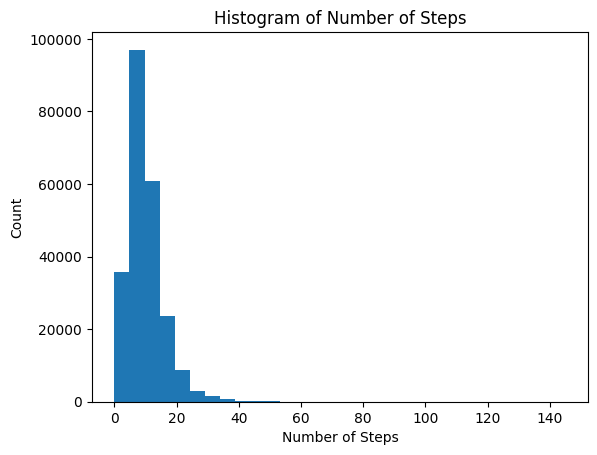

In [17]:
plt.hist(dfc["n_steps"],bins = 30)
plt.xlabel("Number of Steps")
plt.ylabel("Count")
plt.title("Histogram of Number of Steps")
plt.show()

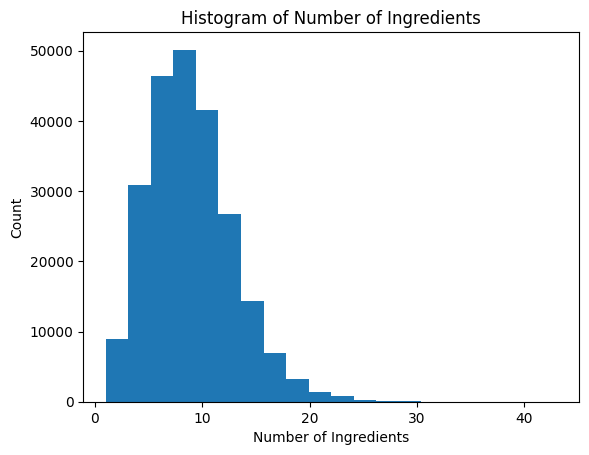

In [19]:
plt.hist(dfc["n_ingredients"],bins = 20)
plt.xlabel("Number of Ingredients")
plt.ylabel("Count")
plt.title("Histogram of Number of Ingredients")
plt.show()

In [ ]:
#Seperate the nutrition info into different columns
nutrition_dfc = pd.DataFrame(dfc['nutrition'].tolist(), columns=['calories', 'total_fat', 'sugar', 'sodium', 'protein', 'saturate_fat', 'carbs'])

dfc = pd.concat([dfc, nutrition_dfc], axis=1)

                                         name      id  minutes  \
0  arriba   baked winter squash mexican style  137739       55   
1            a bit different  breakfast pizza   31490       30   
2                   all in the kitchen  chili  112140      130   
3                          alouette  potatoes   59389       45   
4          amish  tomato ketchup  for canning   44061      190   

   contributor_id   submitted  \
0           47892  2005-09-16   
1           26278  2002-06-17   
2          196586  2005-02-25   
3           68585  2003-04-14   
4           41706  2002-10-25   

                                                tags  \
0  [60-minutes-or-less, time-to-make, course, mai...   
1  [30-minutes-or-less, time-to-make, course, mai...   
2  [time-to-make, course, preparation, main-dish,...   
3  [60-minutes-or-less, time-to-make, course, mai...   
4  [weeknight, time-to-make, course, main-ingredi...   

                                    nutrition  n_steps  \
0       [

In [ ]:
#This section was used to find the indices of the outliars
#sorted_dfc = dfc.sort_values(by='minutes', ascending=False)
sorted_dfc = dfc.sort_values(by='calories', ascending=False)
print(sorted_dfc)

                                             name      id  minutes  \
209453                        tennessee moonshine  193435       20   
70467                        deep fried prime rib  227470      100   
165504                     powdered hot cocoa mix  392286       10   
137181                      mmmmmmmmilky way cake   82848       60   
34023                     caledonian wedding cake   18330      630   
...                                           ...     ...      ...   
224685                             washer cleaner  184171        5   
116592  kasha  buckwheat groats  breakfast cereal  268976       10   
204558       super s peanut butter chocolate soda  312023        5   
202992                          sumac lime crisps  217131       16   
111737    irish  matter of fact peas   mushy peas   21182      500   

        contributor_id   submitted  \
209453          374913  2006-11-01   
70467           485396  2007-05-11   
165504          180317  2009-09-28   
137181 

In [ ]:
entry = dfc.loc[144074, 'minutes']
print(entry)
entry2 = dfc.loc[109624, 'minutes']
print(entry2)

2147483647
1051200


In [ ]:
#Dropping rows with Minutes Outliars
"""dropped_indices = [144074, 109624]
dfc.drop(index=dropped_indices, inplace=True)

dropped_indices = [209453, 70467]
dfc.drop(index=dropped_indices, inplace=True)"""

<Axes: xlabel='minutes', ylabel='calories'>

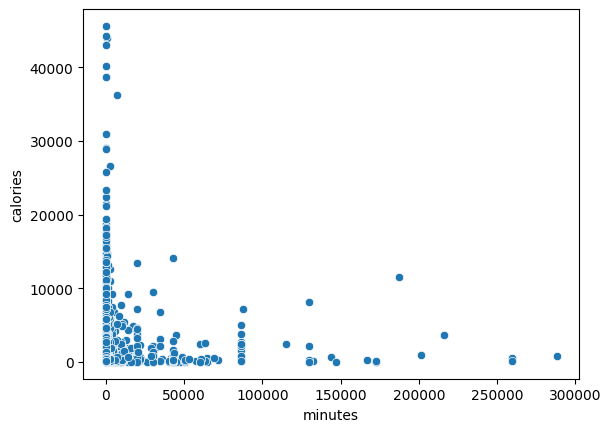

In [ ]:
#Scatterplot for Minutes vs Calories
sns.scatterplot(data=dfc, x='minutes', y='calories')